#**Regresión logística**

Al igual que la regresión lineal múltiple, la regresión logística es una técnica para comprobar hipótesis y relaciones. Tiene la caracteristica adicional de permitir una variable de respuesta de tipo categórica.


![DiferenciaRegresionLineal](https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png)

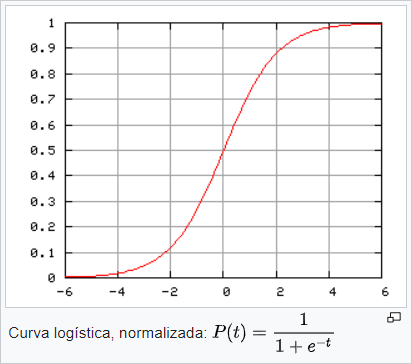

##**Base de datos del titanic**

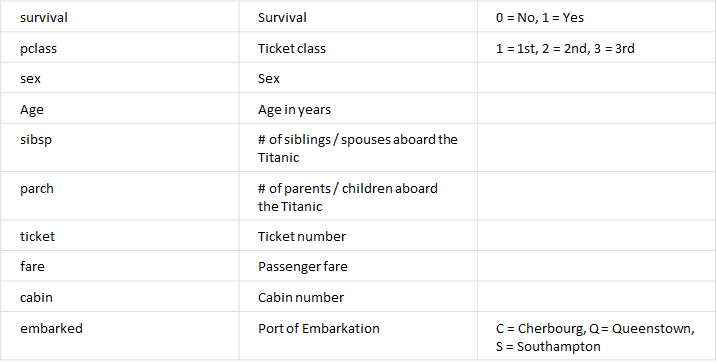


In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Verificar nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 1
df.Sex2.loc[df.Sex=="male"] = 0
df

<ipython-input-37-8d0d7571fd9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 1
<ipython-input-37-8d0d7571fd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,1
886,887,0,2,male,27.0,0,0,13.0000,S,0
887,888,1,1,female,19.0,0,0,30.0000,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [ ]:
df = df.drop('Sex', axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex2
0,1,0,3,22.0,1,0,7.2500,S,0
1,2,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,26.0,0,0,7.9250,S,1
3,4,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,1
886,887,0,2,27.0,0,0,13.0000,S,0
887,888,1,1,19.0,0,0,30.0000,S,1
889,890,1,1,26.0,0,0,30.0000,C,0


In [ ]:
df["EmbarkedC"] = 0
df.EmbarkedC.loc[df.Embarked=="C"] = 1
df.EmbarkedC.loc[df.Embarked!="C"] = 0
df

<ipython-input-39-def598998efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedC.loc[df.Embarked=="C"] = 1
<ipython-input-39-def598998efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedC.loc[df.Embarked!="C"] = 0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex2,EmbarkedC
0,1,0,3,22.0,1,0,7.2500,S,0,0
1,2,1,1,38.0,1,0,71.2833,C,1,1
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,1,0
886,887,0,2,27.0,0,0,13.0000,S,0,0
887,888,1,1,19.0,0,0,30.0000,S,1,0
889,890,1,1,26.0,0,0,30.0000,C,0,1


In [ ]:
df["EmbarkedS"] = 0
df.EmbarkedS.loc[df.Embarked=="S"] = 1
df.EmbarkedS.loc[df.Embarked!="S"] = 0
df["EmbarkedQ"] = 0
df.EmbarkedQ.loc[df.Embarked=="Q"] = 1
df.EmbarkedQ.loc[df.Embarked!="Q"] = 0
df

<ipython-input-40-2fdab0c5144d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedS.loc[df.Embarked=="S"] = 1
<ipython-input-40-2fdab0c5144d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedS.loc[df.Embarked!="S"] = 0
<ipython-input-40-2fdab0c5144d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedQ.loc[df.Embarked=="Q"] = 1
<ipython-input-40-2fdab0c5144d>:6: SettingWithCopyWarning: 
A value is trying t

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex2,EmbarkedC,EmbarkedS,EmbarkedQ
0,1,0,3,22.0,1,0,7.2500,S,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,C,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,S,1,0,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,1,0,0,1
886,887,0,2,27.0,0,0,13.0000,S,0,0,1,0
887,888,1,1,19.0,0,0,30.0000,S,1,0,1,0
889,890,1,1,26.0,0,0,30.0000,C,0,1,0,0


In [ ]:
df = df.drop('Embarked', axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,EmbarkedC,EmbarkedS,EmbarkedQ
0,1,0,3,22.0,1,0,7.2500,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,1,0,0,1
886,887,0,2,27.0,0,0,13.0000,0,0,1,0
887,888,1,1,19.0,0,0,30.0000,1,0,1,0
889,890,1,1,26.0,0,0,30.0000,0,1,0,0


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex2             int64
EmbarkedC        int64
EmbarkedS        int64
EmbarkedQ        int64
dtype: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier  # Puedes cambiar este clasificador por el que prefieras

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X = df.drop('Survived', axis=1)  # Features (características)
y = df['Survived']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación (por ejemplo, un árbol de decisiones)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión, la exhaustividad y la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

#print("Precisión:", precision)
print("precision del modelo", accuracy)
print("Exhaustividad (Recall):", recall)
#print("Exactitud (Accuracy):", accuracy)
#print("Matriz de confusión:\n", confusion)

# Crear un DataFrame con resultados
results_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Mostrar los primeros registros del DataFrame
print(results_df)


precision del modelo 0.8041958041958042
Exhaustividad (Recall): 0.7377049180327869
     True  Predicted
111     0          1
114     0          1
788     1          1
253     0          0
607     1          1
..    ...        ...
881     0          0
521     0          0
700     1          1
348     1          1
371     0          0

[143 rows x 2 columns]


     True  Predicted
571     1          1
218     1          1
362     0          0
43      1          0
883     0          0
Matriz de confusión:
 [[75 13]
 [23 32]]


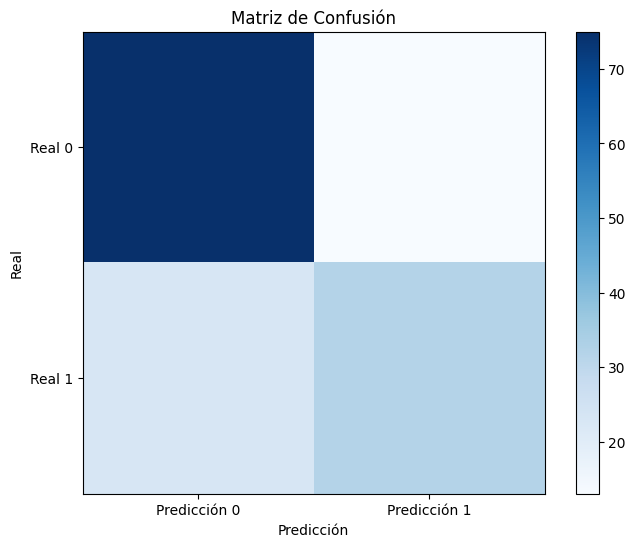

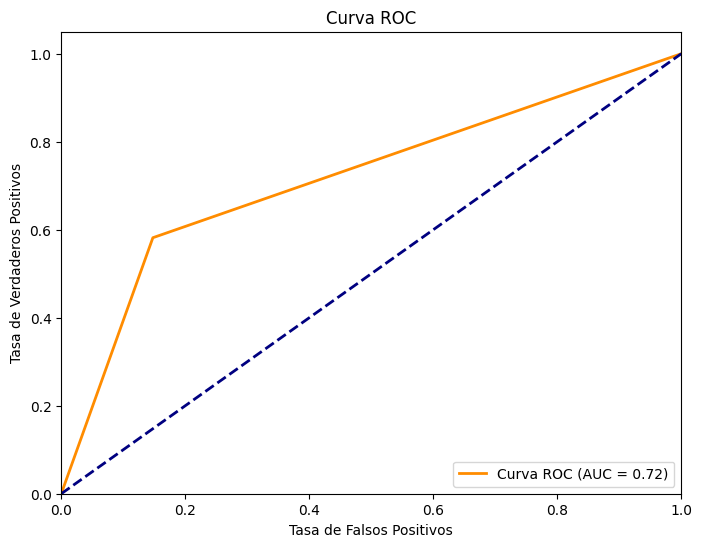

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Crear un DataFrame con resultados
results_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Mostrar los primeros registros del DataFrame
print(results_df.head())

# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", confusion)

# Crear una matriz de confusión visual
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks([0, 1], ['Predicción 0', 'Predicción 1'])
plt.yticks([0, 1], ['Real 0', 'Real 1'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Calcular y mostrar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
